# Otimização do Lucro de um Sapateiro Utilizando um Algoritmo Genético

Documento criado por __Rodrigo Cesar Vertulo__ em 15 de Novembro de 2019.

O enunciado do estudo de caso apresentado nesse documento foi retirado do livro "Pesquisa Operacional para os cursos de: Economia, Administração e Ciências Contábeis" dos autores Ermes Medeiros da Silva, Elio Medeiros da Silva e Afrânio Carlos Murolo.

O problema apresentado foi resolvido pelos autores utilizando programação linear e nesse documento apresentarei uma alternativa para a sua resolução utilizando um Algoritmo Genético implementado com a linguagem de programação Python e a biblioteca <a href="https://github.com/rvertulo/PyGARV" taget="_new">PyGARV</a>. O objetivo é verificar e comparar os resultados obtidos pelas duas abordagens.

O enunciado do problema é o seguinte: "Um sapateiro faz 6 sapatos por hora, se fizer somente sapatos, e 5 cintos por hora, se fizer somente cintos. Ele gasta 2 unidades de couro para fabricar 1 unidade de sapato e 1 unidade de couro para fabricar uma unidade de cinto. Sabendo-se que o total disponível de couro é de 6 unidades e que o lucro unitário por sapato é de 5 unidades monetárias e o do cinto é de 2 unidades monetárias, quantas unidades de sapatos e de cintos o sapateiro deverá produzir para maximizar o seu lucro por hora?"

A modelagem do sistema é a seguinte:

* x1 = número de sapatos a serem produzidos
* x2 = número de cintos a serem produzidos

__max. Lucro = 5x1 + 2x2__

Sujeito a:

* 10x1 + 12x2 <= 60 (restrição do tempo gasto em minutos para produzir cada item por hora)
* 2x1 + 1x2 <= 6 (restrição da quantidade de couro disponível)
* x1 >= 0 (não é possível produzir um número negativo de sapatos)
* x2 >= 0 (não é possível produzir um número negativo de cintos)

O Algoritmo Genético utilizará cromossomos contendo dois valores inteiros e positivos variando de 0 a 99, tendo em vista que observando-se as restrições do problema nenhuma das variáveis poderá assumir valores menores do que zero ou superiores a 99 sem que alguma delas seja desrespeitada.

O código a seguir implementa a solução para o problema.

Lucro: 15   x1: 3    x2: 0


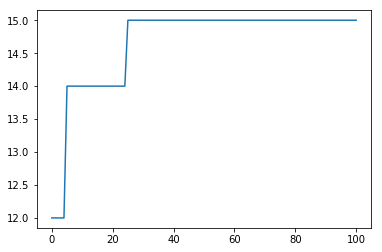

In [7]:
from PyGARV import *
import matplotlib.pyplot as plt

class Example_PO3(PyGARV):
    def __init__(self):
        super().__init__(popSize=30,
                         values=2,
                         mutationRate=0.2,
                         fullMutation=True,
                         symmetricCut=False,
                         elitism=0.1,
                         digits=2)
        
        self.valores = []
        
    def fitness(self, cromossomo):
        x1 = cromossomo[0]
        x2 = cromossomo[1]
        
        f = 5*x1 + 2*x2
        
        if(
            10*x1 + 12*x2 <= 60 and
            2*x1 + 1*x2 <= 6 and
            x1 >= 0 and
            x2 >= 0
        ):
            
            self.nota = f
            
        else:
            self.nota = 1/(f+1)
            
        return [cromossomo, self.nota]
    
    def finishedGeneration(self, melhorCromossomo):
        self.x1 = melhorCromossomo[0]
        self.x2 = melhorCromossomo[1]
        
        self.f = 5*self.x1 + 2*self.x2
        
        if self.nota > 1:
            self.valores.append(self.f)

            
pygarv = Example_PO3()
pygarv.runGA(150)

print("Lucro: %i   x1: %i    x2: %i" % (pygarv.f, pygarv.x1, pygarv.x2))
plt.plot(pygarv.valores)
plt.show()

As soluções obtidas por Algoritmos Genéticos nem sempre são ótimas, porém, normalmente chegam muito próximas ao resultado ótimo. No caso deste estudo de caso o Algoritmo Genético chegou à solução ótima, obtendo o mesmo resultado apresentado pelos autores do livro utilizando 150 gerações.